In [1]:
import sys
#sys.path.append("C:/Users/Surface/Documents/repos/playground")
sys.path.append("/home/peterhacker/Documents/phRepo/playground")

from Oceanmodel.policy_ve import *
from Oceanmodel.stateupdates_ve import *
from Oceanmodel.engine import *



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1460, 2, 1, 1)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.21s


In [2]:
# Analysis and plotting modules
import pandas as pd
# import plotly
import matplotlib.pyplot as plt

In [3]:
simulation_result.head()
simulation_result.agents_oceanholder[25]
simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[0].keys()
simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[20][].veaccounts.keys()

simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[3]['a6fa9488-7210-46d1-96e3-15f2599855c3'].veaccounts['2b8c5ed2-b138-44f4-b129-954febbc2af6'].locked


SyntaxError: invalid syntax (883390667.py, line 4)

In [9]:
for agent in simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[0].keys():
    #for i in range(0,30):
    #    print(f"timestep: {simulation_result[simulation_result.substep == 2].iloc[i].timestep} | ocean_balance {simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[i][agent].oceanbalance}")

    for acct in simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[20][agent].veaccounts.keys():
        for i in range(510,530):
            if len(simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[i][agent].veaccounts.keys()) == 0:
                print(f"timestep: {i} | no ve accounts")
            else:
                print(f"timestep: {simulation_result[simulation_result.substep == 2].iloc[i].timestep} | ve_locked {simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[i][agent].veaccounts[acct].locked} | ve_unlocked {simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[i][agent].veaccounts[acct].unlocked} | ve_withdrawn {simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[i][agent].veaccounts[acct].withdrawn} | ve_duration {simulation_result[simulation_result.substep == 2].agents_oceanholder.iloc[i][agent].veaccounts[acct].lockduration}")
        

timestep: 511 | ve_locked 12313.3609851324 | ve_unlocked 442209.5378794722 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 512 | ve_locked 11412.730561752629 | ve_unlocked 443110.16830285196 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 513 | ve_locked 10512.100138372858 | ve_unlocked 444010.79872623173 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 514 | ve_locked 9611.469714993087 | ve_unlocked 444911.4291496115 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 515 | ve_locked 8710.839291613258 | ve_unlocked 445812.05957299133 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 516 | ve_locked 7810.208868233487 | ve_unlocked 446712.6899963711 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 517 | ve_locked 6909.578444853716 | ve_unlocked 447613.3204197509 | ve_withdrawn 0.0 | ve_duration 504.6719354193302
timestep: 518 | ve_locked 6008.948021473945 | ve_unlocked 448513.95084313065 | ve_withdrawn 0.0 | ve_durati

In [ ]:
# Plots for each oceanholder:
# x1. ocean balance over time
# x2. ve balance over time
# x3. ocean locked over time
# x4. ocean unlocked over time
# x5. ocean withdrawn over time

# Plots for each ve account:
# 1. ve balance over time
# 2. ocean locked over time
# 3. ocean unlocked over time
# 4. ocean withdrawn over time


Agent 1fe4ec17-4da5-4e2a-8b7f-92ec9b77255e


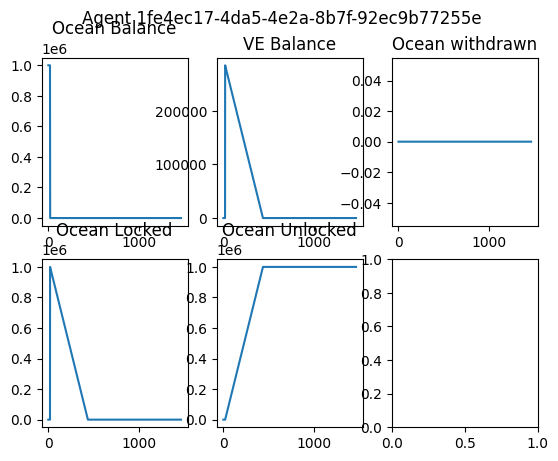

In [3]:
agents_list = []
for i in range(len(simulation_result)):
    agents_list.append(simulation_result.agents_oceanholder[i].keys())

agents_list = list(set([item for sublist in agents_list for item in sublist]))

# create dataframe with columns timestep, acct_id, locked, unlocked, withdrawn, ve_balance
ve_account_data = pd.DataFrame(index=range(1, max(simulation_result.timestep)+1), columns=['locked', 'unlocked', 'withdrawn', 've_balance'])

for agent in agents_list:
    print(f"Agent {agent}")
    # aggregate ve account data for agent
    for i in range(0, max(simulation_result.timestep)):
        #print(f"timestep: {i+1}")
        acct_list = simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts.keys()
        #print(f"ve accounts: {acct_list}")
        df_temp = pd.DataFrame()
        if len(acct_list) > 0:
            count_acct = 0
            for acct in acct_list:
                #print(f"ve account: {acct}, timestep: {i+1}, locked: {simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].locked}, unlocked: {simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].unlocked}, withdrawn: {simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].withdrawn}")
                # for every ve acct, we want timestep, locked, unlocked, withdrawn, ve balance
                df_temp.loc[count_acct,'timestep'] = i+1
                df_temp.loc[count_acct,'acct_id'] = acct
                df_temp.loc[count_acct,'locked'] = simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].locked
                df_temp.loc[count_acct,'unlocked'] = simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].unlocked
                df_temp.loc[count_acct,'withdrawn'] = simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].withdrawn
                df_temp.loc[count_acct,'ve_balance'] = simulation_result[simulation_result.substep == 2].iloc[i].agents_oceanholder[agent].veaccounts[acct].vebalance
                count_acct += 1
        else:
            df_temp.loc[0,'timestep'] = i+1
            df_temp.loc[0,'acct_id'] = None
            df_temp.loc[0,'locked'] = None
            df_temp.loc[0,'unlocked'] = None
            df_temp.loc[0,'withdrawn'] = None
            df_temp.loc[0,'ve_balance'] = None
        ve_account_data.loc[i+1, 'locked'] = df_temp['locked'].sum()
        ve_account_data.loc[i+1, 'unlocked'] = df_temp['unlocked'].sum()
        ve_account_data.loc[i+1, 'withdrawn'] = df_temp['withdrawn'].sum()
        ve_account_data.loc[i+1, 've_balance'] = df_temp['ve_balance'].sum()
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f"Agent {agent}")
    axs[0, 0].plot(simulation_result[simulation_result.substep == 2].timestep, simulation_result[simulation_result.substep == 2].agents_oceanholder.apply(lambda x: x[agent].oceanbalance))
    axs[0, 0].set_title('Ocean Balance')
    axs[0, 1].plot(simulation_result[simulation_result.substep == 2].timestep, ve_account_data.ve_balance)
    axs[0, 1].set_title('VE Balance')
    axs[1, 0].plot(simulation_result[simulation_result.substep == 2].timestep, ve_account_data.locked)
    axs[1, 0].set_title('Ocean Locked')
    axs[1, 1].plot(simulation_result[simulation_result.substep == 2].timestep, ve_account_data.unlocked)
    axs[1, 1].set_title('Ocean Unlocked')
    axs[0, 2].plot(simulation_result[simulation_result.substep == 2].timestep, ve_account_data.withdrawn)
    axs[0, 2].set_title('Ocean withdrawn')
    plt.show()
